# .str

In [4]:
import pandas as pd
inspections = pd.read_csv("datas/chicago_food_inspections.csv")

In [5]:
inspections.Risk.value_counts()

Risk 1 (High)      107351
Risk 2 (Medium)     31845
Risk 3 (Low)        14529
All                    19
Name: Risk, dtype: int64

In [6]:
inspections["Name"]

0                 MARRIOT MARQUIS CHICAGO   
1                                JETS PIZZA 
2                                 ROOM 1520 
3                  MARRIOT MARQUIS CHICAGO  
4                              CHARTWELLS   
                         ...                
153805                           WOLCOTT'S  
153806       DUNKIN DONUTS/BASKIN-ROBBINS   
153807                             Cafe 608 
153808                          mr.daniel's 
153809                           TEMPO CAFE 
Name: Name, Length: 153810, dtype: object

In [7]:
inspections["Name"].head().values

array([' MARRIOT MARQUIS CHICAGO   ', ' JETS PIZZA ', '   ROOM 1520 ',
       '  MARRIOT MARQUIS CHICAGO  ', ' CHARTWELLS   '], dtype=object)

In [9]:
inspections["Name"].str
# 데이터 프레임의 오브젝트 타입을 파이썬의 str타입으로 바꿔, 기존의 str에 적용되는 메서드 사용 가능

In [13]:
# strip 계열 메서드 -> 문자열 앞뒤의 공백 제거
dessert = "   cheese   "
print(dessert.strip())
print(dessert.lstrip())
print(dessert.rstrip())

cheese
cheese   
   cheese


In [14]:
inspections["Name"].str.lstrip().head(3)

0    MARRIOT MARQUIS CHICAGO   
1                   JETS PIZZA 
2                    ROOM 1520 
Name: Name, dtype: object

In [15]:
inspections["Name"].str.rstrip().head(3)

0     MARRIOT MARQUIS CHICAGO
1                  JETS PIZZA
2                   ROOM 1520
Name: Name, dtype: object

In [16]:
inspections["Name"].str.strip().head(3)

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
Name: Name, dtype: object

In [19]:
inspections["Name"] = inspections["Name"].str.strip()
inspections

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JETS PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
4,CHARTWELLS,Risk 1 (High)
...,...,...
153805,WOLCOTT'S,Risk 1 (High)
153806,DUNKIN DONUTS/BASKIN-ROBBINS,Risk 2 (Medium)
153807,Cafe 608,Risk 1 (High)
153808,mr.daniel's,Risk 1 (High)


In [21]:
inspections.columns

Index(['Name', 'Risk'], dtype='object')

In [24]:
for column in inspections.columns:
    inspections[column] = inspections[column].str.strip()
#전체 컬럼 한번에 처리

In [25]:
inspections["Name"].str.lower().head()

0    marriot marquis chicago
1                 jets pizza
2                  room 1520
3    marriot marquis chicago
4                 chartwells
Name: Name, dtype: object

In [26]:
inspections["Name"].str.upper().head()

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
3    MARRIOT MARQUIS CHICAGO
4                 CHARTWELLS
Name: Name, dtype: object

In [28]:
inspections["Name"].str.capitalize().head()

0    Marriot marquis chicago
1                 Jets pizza
2                  Room 1520
3    Marriot marquis chicago
4                 Chartwells
Name: Name, dtype: object

In [32]:
inspections["Name"].str.title().head()

0    Marriot Marquis Chicago
1                 Jets Pizza
2                  Room 1520
3    Marriot Marquis Chicago
4                 Chartwells
Name: Name, dtype: object

In [36]:
inspections["Risk"].unique() # 유일한 값 ndarray로 반환

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

In [43]:
inspections = inspections.dropna(subset = ["Risk"]) #결측지 제거
inspections["Risk"].unique() 

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)',
       'Risk 4 (Extreme)'], dtype=object)

In [ ]:
inspections = inspections.replace(to_replace ="All", value = "Risk 4 (Extreme)")
# "All" -> Risk4로 치환
# dataframe.replace(to_replace = "바꿀 값", value = "결과 값")
inspections["Risk"].unique() #데이터 통일성 확보보

In [44]:
inspections["Risk"].str[5].astype("i").head() #문자열 인덱싱 -> 정수 추출

0    1
1    2
2    3
3    1
4    1
Name: Risk, dtype: int32

In [45]:
inspections["Risk"].str[8:-1].astype("category").head()

0      High
1    Medium
2       Low
3      High
4      High
Name: Risk, dtype: category
Categories (4, object): ['Extreme', 'High', 'Low', 'Medium']

In [60]:
has_pizza = inspections["Name"].str.lower().str.contains("pizza")
# 문자열 통일 후 "pizza"를 포함하는 값만 저장
inspections[has_pizza]


,Name,Risk
1,JETS PIZZA,Risk 2 (Medium)
19,NANCY'S HOME OF STUFFED PIZZA,Risk 1 (High)
27,"NARY'S GRILL & PIZZA ,INC.",Risk 1 (High)
29,NARYS GRILL & PIZZA,Risk 1 (High)
68,COLUTAS PIZZA,Risk 1 (High)
...,...,...
153756,ANGELO'S STUFFED PIZZA CORP,Risk 1 (High)
153764,COCHIAROS PIZZA #2,Risk 1 (High)
153772,FERNANDO'S MEXICAN GRILL & PIZZA,Risk 1 (High)
153788,REGGIO'S PIZZA EXPRESS,Risk 1 (High)


In [54]:
inspections["Name"].str # -> 스트링메서드 사용 가능한 상태

dtype('O')

In [ ]:
inspections["Name"].str.lower() 
# 메서드 사용 후 오브젝트 타입
# 재사용 시 .str 다시 적용

In [57]:
starts_with_tacos = (
    inspections["Name"].str.lower().str.startswith("tacos")
)
# startswith()로 시작되는 문자열 추출
inspections[starts_with_tacos]

,Name,Risk
69,TACOS NIETOS,Risk 1 (High)
556,TACOS EL TIO 2 INC.,Risk 1 (High)
675,TACOS DON GABINO,Risk 1 (High)
958,TACOS EL TIO 2 INC.,Risk 1 (High)
1036,TACOS EL TIO 2 INC.,Risk 1 (High)
...,...,...
143587,TACOS DE LUNA,Risk 1 (High)
144026,TACOS GARCIA,Risk 1 (High)
146174,Tacos Place's 1,Risk 1 (High)
147810,TACOS MARIO'S LIMITED,Risk 1 (High)


In [63]:
ends_with_tacos = (
    inspections["Name"].str.lower().str.endswith("tacos")
)
inspections[ends_with_tacos]

,Name,Risk
382,LAZO'S TACOS,Risk 1 (High)
569,LAZO'S TACOS,Risk 1 (High)
2652,FLYING TACOS,Risk 3 (Low)
3250,JONY'S TACOS,Risk 1 (High)
3812,PACO'S TACOS,Risk 1 (High)
...,...,...
151121,REYES TACOS,Risk 1 (High)
151318,EL MACHO TACOS,Risk 1 (High)
151801,EL MACHO TACOS,Risk 1 (High)
153087,RAYMOND'S TACOS,Risk 1 (High)


# 다중인덱싱

In [65]:
import numpy as np
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                   columns = [["A", "A", "B", "B"],
                              ["C1", "C2", "C1", "C2"]]) #다중 인덱스
df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

In [66]:
df3.columns.names = ["Cidx1", "Cidx2"] # 컬럼 인덱스들의 이름 지정
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [70]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6,4),2),
                   columns=[["A","A","B","B"],
                            ["C", "D","C","D"]],
                   index = [["M","M","M","F","F","F"],
                            ["id_" + str(i+1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [73]:
df4.stack("Cidx1") # 컬럼 인덱스 -> row 인덱스로 변환

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [75]:
df4.unstack("Ridx2") # row인덱스 -> 컬럼 인덱스로 변환

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

In [76]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [91]:
df3[("B","C1")] #다중인덱스 인덱싱

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64

In [89]:
df3.loc[0, ("B","C1")]

0.98

In [ ]:
df3.iloc[0,2] # iloc는 다중 인덱스 사용 불가

In [93]:
df3['A']

Cidx2,C1,C2
0,1.76,0.40
1,1.87,-0.98
2,-0.10,0.41
3,0.76,0.12
4,1.49,-0.21


In [94]:
df4.loc[("M","id_1"),("A","C")]

1.76

In [97]:
df4.loc[:,("A","C")]

Ridx1  Ridx2
M      id_1     1.76
       id_2     1.87
       id_3    -0.10
F      id_1     0.76
       id_2     1.49
       id_3    -2.55
Name: (A, C), dtype: float64

In [98]:
df4.loc[("M", "id_1"),:]

Cidx1  Cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id_1), dtype: float64

In [100]:
df4.loc[("All","All"), :] =df4.sum()
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [101]:
df4.loc["M"]

Cidx1     A           B      
Cidx2     C     D     C     D
Ridx2                        
id_1   1.76  0.40  0.98  2.24
id_2   1.87 -0.98  0.95 -0.15
id_3  -0.10  0.41  0.14  1.45

In [103]:
df4.loc[("M", slice(None)),:]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45

In [105]:
df4.loc[(slice(None), "id_1"), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
F     id_1   0.76  0.12  0.44  0.33

In [107]:
df6 = df4.swaplevel("Cidx1","Cidx2", 1) # swaplevel(i, j, axis)
df6

Cidx2           C     D     C     D
Cidx1           A     A     B     B
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [109]:
df5 = df4.swaplevel("Ridx1", "Ridx2")
df5

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [110]:
df5.sort_index(level=0) # Ridx1을 기준으로 정렬

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
All   All    3.23  0.39  3.68  2.28
id_1  F      0.76  0.12  0.44  0.33
      M      1.76  0.40  0.98  2.24
id_2  F      1.49 -0.21  0.31 -0.85
      M      1.87 -0.98  0.95 -0.15
id_3  F     -2.55  0.65  0.86 -0.74
      M     -0.10  0.41  0.14  1.45

In [111]:
df6.sort_index(axis=1, level=0)

Cidx2           C           D      
Cidx1           A     B     A     B
Ridx1 Ridx2                        
M     id_1   1.76  0.98  0.40  2.24
      id_2   1.87  0.95 -0.98 -0.15
      id_3  -0.10  0.14  0.41  1.45
F     id_1   0.76  0.44  0.12  0.33
      id_2   1.49  0.31 -0.21 -0.85
      id_3  -2.55  0.86  0.65 -0.74
All   All    3.23  3.68  0.39  2.28

# pd.merge(df1,df2)

In [112]:
df1 = pd.DataFrame({
    '고객번호' : [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름' : list("abcdefg")
}, columns=['고객번호','이름'])
df1

,고객번호,이름
0,1001,a
1,1002,b
2,1003,c
3,1004,d
4,1005,e
5,1006,f
6,1007,g


In [113]:
df2 = pd.DataFrame({
    '고객번호': [ 1001,1001, 1005, 1006, 1008,1001],
    '금액' : [10000,20000,15000,5000, 10000,30000]
}, columns = ['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,10000
5,1001,30000


In [114]:
pd.merge(df1,df2) 
# inner join -> 양쪽 df에 키가 존재하는 데이터만 merge 

,고객번호,이름,금액
0,1001,a,10000
1,1001,a,20000
2,1001,a,30000
3,1005,e,15000
4,1006,f,5000


In [116]:
pd.merge(df1, df2, how = 'outer')
# 키 값이 한쪽에만 있어도 merge

,고객번호,이름,금액
0,1001,a,10000.0
1,1001,a,20000.0
2,1001,a,30000.0
3,1002,b,NaN
4,1003,c,NaN
5,1004,d,NaN
6,1005,e,15000.0
7,1006,f,5000.0
8,1007,g,NaN
9,1008,NaN,10000.0


In [118]:
pd.merge(df1,df2, how = 'left')

,고객번호,이름,금액
0,1001,a,10000.0
1,1001,a,20000.0
2,1001,a,30000.0
3,1002,b,NaN
4,1003,c,NaN
5,1004,d,NaN
6,1005,e,15000.0
7,1006,f,5000.0
8,1007,g,NaN


In [119]:
pd.merge(df1,df2, how = 'right')

,고객번호,이름,금액
0,1001,a,10000
1,1001,a,20000
2,1005,e,15000
3,1006,f,5000
4,1008,NaN,10000
5,1001,a,30000


In [120]:
df1 = pd.DataFrame({
    '품종' :[ 'setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이' : [1.4, 1.3, 1.5, 1.3]})
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [121]:
df2 = pd.DataFrame({
    '품종' :[ 'setosa', 'virginica', 'virginica','versicolor'],
    '꽃잎너비' : [0.4, 0.3, 0.5, 0.3]},
    columns = ['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [122]:
pd.merge(df1,df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


# dataframe.goupby(col)

In [127]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1' : list('AABBA'),
    'key2' : ['one', 'two', 'one', 'two', 'one'],
    'data1' : [_ for _ in range(1,6)],
    'data2': [_ for _ in list(range(10,60,10))]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [135]:
groups = df2.groupby(df2.key1) # 그룹 연산을 위한 객체를 변수에 저장
groups

In [133]:
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [136]:
df2.data1.groupby(df2.key1).sum() # 바로 적용

key1
A    8
B    7
Name: data1, dtype: int64

In [138]:
df2.groupby(df2.key1).sum()["data1"] # 위와 동일

key1
A    8
B    7
Name: data1, dtype: int64

In [144]:
df2.data1.groupby([df2.key1, df2.key2]).sum() #복합키 지정 시 리스트

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

# DatetimeIndex

In [147]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5","2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [148]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index = idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

In [149]:
pd.date_range("2018-4-1", "2018-4-30") # 범위 내 인덱스 생성

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [150]:
pd.date_range(start = "2018-4-1", periods = 30) # 시작일부터 해당 기간까지 범위 내 인덱스

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

### freq 인수
https://29-2y86784.slack.com/archives/C04LM17RLNP/p1678436464820169

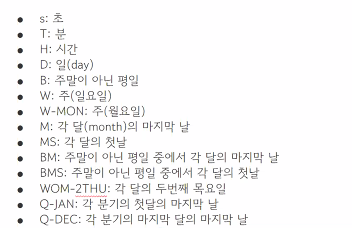

In [156]:
pd.date_range("2018-4-1", "2018-4-30", freq = "W")

DatetimeIndex(['2018-04-01', '2018-04-08', '2018-04-15', '2018-04-22',
               '2018-04-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [159]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index = pd.date_range(
    "2018-1-1", periods=4, freq = "M"))
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [160]:
ts.shift(1) #데이터만 한 줄씩 이동

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [161]:
ts.shift(1,freq = "M") # 날짜 다음 달로 이동

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [163]:
s = pd.Series(pd.date_range("2020-12-25", periods =100, freq = "D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [164]:
s.dt.year # 접근자 .dt -> year, month, day 등의 속성 이용 가능

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

In [165]:
s.dt.strftime("%Y년 %m월 %d일") 
# strftime(문자열포맷) -> datetime을 문자열 포맷으로

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

### datetime formating
https://29-2y86784.slack.com/archives/C04LM17RLNP/p1678437276442129

In [167]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [202]:
def change_boolean(value):
    if value == "yes":
        return True
    else:
        return False

titanic.alive = titanic.alive.apply(change_boolean)


In [203]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,False,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,False,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,False,True
